In [1]:
# notebook last tested with abtem version 1.0.0beta7

from abtem import __version__
print('current version:', __version__)

import matplotlib.pyplot as plt
from ase.io import read

from abtem import *

current version: 1.0.0beta7


In [ ]:
device = 'cpu'

# Basic 4D-STEM simulation

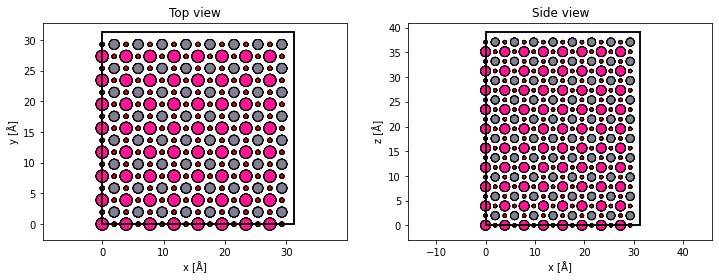

In [2]:
atoms = read('data/srtio3_100.cif')

atoms *= (8, 8, 10)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

show_atoms(atoms, ax=ax1, title='Top view')
show_atoms(atoms, ax=ax2, plane='xz', title='Side view')

In [3]:
potential = Potential(atoms, 
                      gpts=1024, 
                      device=device, 
                      projection='infinite', 
                      slice_thickness=.5, 
                      parametrization='kirkland', 
                      storage=device).build(pbar=True)

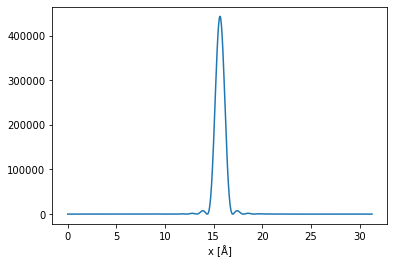

In [4]:
probe = Probe(energy=300e3, semiangle_cutoff=9.4, device=device, rolloff=0.05)

probe.grid.match(potential)

probe.profile().show();

In [5]:
detector = PixelatedDetector(max_angle=150)

end = (potential.extent[0] / 8, potential.extent[1] / 8)

gridscan = GridScan(start=[0, 0], end=end, sampling=.2)

measurements = probe.scan(gridscan, [detector], potential)

In [6]:
measurement = measurements[detector]

In [7]:
measurement.array.shape

(20, 20, 477, 477)

### Single diffraction patterns 

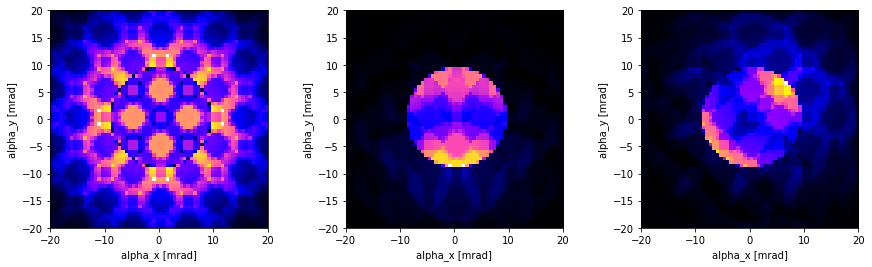

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,4))

measurement[0, 0].show(cmap='gnuplot2', ax=ax1);
measurement[0, 4].show(cmap='gnuplot2', ax=ax2);
measurement[8, 8].show(cmap='gnuplot2', ax=ax3);

for ax in (ax1, ax2, ax3):
    ax.set_xlim([-20,20])
    ax.set_ylim([-20,20])

### Integrated signal

(<AxesSubplot:xlabel='x [Å]', ylabel='y [Å]'>,
 <matplotlib.image.AxesImage at 0x15911e67fa0>)

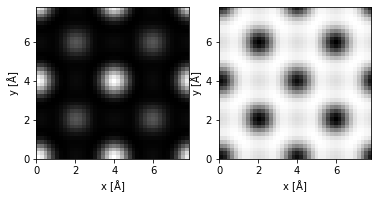

In [9]:
from abtem.detect import AnnularDetector

bright_detector = AnnularDetector(inner=0, outer=9.4)
haadf_detector = AnnularDetector(inner=70, outer=150)

fig, (ax1, ax2) = plt.subplots(1, 2)

haadf_measurement = haadf_detector.integrate(measurement)
haadf_measurement.tile((2,2)).show(ax=ax1)

bright_measurement = bright_detector.integrate(measurement)
bright_measurement.tile((2,2)).show(ax=ax2)

### Center of mass

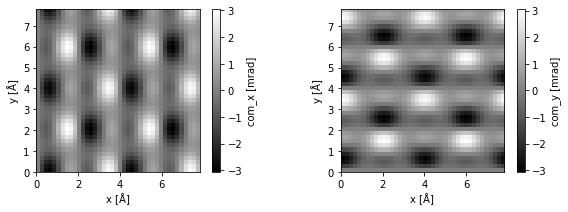

In [10]:
from abtem.measure import center_of_mass

com_x, com_y = center_of_mass(measurement)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3))

com_x.tile((2, 2)).show(ax=ax1, colorbar=True)
com_y.tile((2, 2)).show(ax=ax2, colorbar=True);

### Position-averaged convergent beam electron diffraction (PACBED)

(-20.0, 20.0)

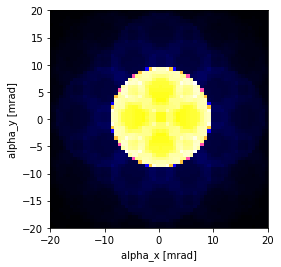

In [11]:
pacbed = measurement.mean(axis=(0, 1))

ax, _ = pacbed.show(cmap='gnuplot2')

ax.set_xlim([-20,20])
ax.set_ylim([-20,20])